### 1. 문제정의
- 손글씨(0 ~ 9)를 분류하는 모델을 만들어보자.
- 이미지 데이터의 형태를 이해해보자.

### 2. 데이터 수집
- csv 파일

In [1]:
# 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/digit_train.csv')
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# 데이터의 크기 확인
data.shape

(42000, 785)

In [8]:
data.head()
# label : 정답
# pixel0 ~ pixel 783(784개) : 28*28 px 이미지 표현

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [21]:
# 데이터 시각화
# 이미지 데이터로 첫번째 행(이미지)의 label을 제외한 모든 컬럼 가져오기
img0 =data.iloc[  0 , 1 : ]
img0.shape

(784,)

In [24]:
img0.values

# 배열 자료형을 28 * 28의 2차원의 형태로 변환
img0_reshape = img0.values.reshape(28, 28)
img0_reshape

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 188, 255,  94,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,
          0,   0],
       [  

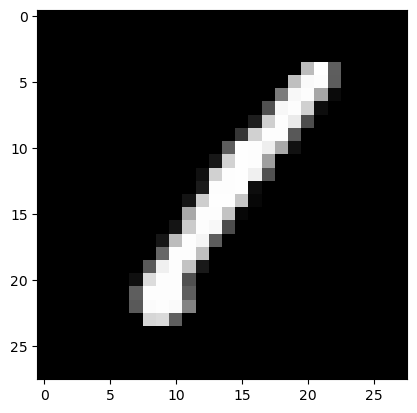

1

In [31]:
# 이미지 그려보기

plt.imshow(img0_reshape, cmap='gray') # 숫자 1
plt.show()

# 정답 확인
data.iloc[0, 0]

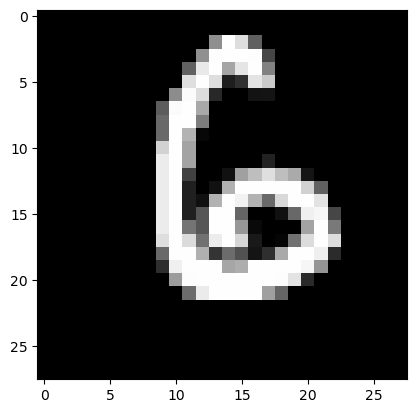

6

In [41]:
# 실습) 이미지 확인하기
# 인덱스번호 기준, 13720행 이미지 데이터 가져와서 -> 이미지 그려보기
img13720 = data.iloc[13720, 1 : ]
img13720

img13720_reshape = img13720.values.reshape(28, 28)
img13720_reshape

plt.imshow(img13720_reshape, cmap='gray')
plt.show()

data.iloc[13720, 0]

### 3. 데이터 전처리 ~ 4. 탐색적 데이터 분석(EDA)

In [ ]:
# 데이터 분리
# 학습(7) : 테스트(3)

# 1) 문제(X), 답(y) 분리
X = data.iloc[:, 1 : ] # 문제 데이터
y = data.iloc[:, 0] # 답 데이터

# 2) 문제와 정답을 7:3 비율로 나눠주기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [49]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [52]:
# 각 데이터들의 크기 확인
print('훈련 데이터 : ', X_train.shape, y_train.shape)
print('답 데이터 : ', X_test.shape, y_test.shape)

훈련 데이터 :  (29400, 784) (29400,)
답 데이터 :  (12600, 784) (12600,)


### 5. 모델링
- KNN
- Logistic Regression
- SVM

In [54]:
# 라이브러리 호출
from sklearn.neighbors import KNeighborsClassifier # knn
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀(분류)
from sklearn.svm import LinearSVC # 서포트 벡터 머신 모델

In [56]:
# 모델 생성
knn_model = KNeighborsClassifier() # knn

logi_model = LogisticRegression() # 로지스틱 회귀(분류)

svm_model = LinearSVC() # 서포트 벡터 머신 모델

### 6. 모델 학습

In [57]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [58]:
logi_model.fit(X_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
svm_model.fit(X_train, y_train)

LinearSVC()

In [60]:
# 평가
knn_model.score(X_test, y_test)

0.9650793650793651

In [61]:
logi_model.score(X_test, y_test)

0.9147619047619048

In [62]:
svm_model.score(X_test, y_test)

0.9061111111111111

### 7. 예측 및 평가

In [ ]:
# 35814번 이미지 문제데이터
# X_train_reshape = X_train.loc[35814].values.reshape(28, 28)

# 로지스틱 회귀 모델
# logi_model.predict(X_train_reshape)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: X has 28 features, but LogisticRegression is expecting 784 features as input.

### 8. 평가지표

In [68]:
# 오차행렬 불러오기
from sklearn.metrics import confusion_matrix

In [ ]:
logi_pre = logi_model.predict(X_test)

# 혼동 행렬
confusion_matrix(y_test, logi_pre)

array([[1192,    0,    3,    5,    4,   14,   11,    2,    7,    0],
       [   0, 1353,    5,    7,    3,    3,    0,    2,   12,    1],
       [   9,   16, 1087,   29,   17,    4,   11,   19,   27,    4],
       [   2,    3,   31, 1211,    2,   45,    1,   12,   26,    8],
       [   2,    6,   11,    2, 1107,    1,   11,    3,   10,   55],
       [  17,    2,    9,   50,   14,  950,   23,   10,   37,   12],
       [  10,    3,   22,    2,   15,   19, 1165,    1,    8,    1],
       [   5,    5,    9,    7,   10,    3,    1, 1261,    3,   45],
       [   9,   26,    9,   35,    3,   27,    6,    5, 1056,   14],
       [  10,    6,    7,   24,   35,   10,    0,   45,   14, 1144]],
      dtype=int64)

In [73]:
from sklearn.metrics import classification_report

print(classification_report(y_test, logi_pre)) # print 함수를 통해서 이스케이프 문자 처리


              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1238
           1       0.95      0.98      0.96      1386
           2       0.91      0.89      0.90      1223
           3       0.88      0.90      0.89      1341
           4       0.91      0.92      0.92      1208
           5       0.88      0.85      0.86      1124
           6       0.95      0.93      0.94      1246
           7       0.93      0.93      0.93      1349
           8       0.88      0.89      0.88      1190
           9       0.89      0.88      0.89      1295

    accuracy                           0.91     12600
   macro avg       0.91      0.91      0.91     12600
weighted avg       0.91      0.91      0.91     12600

